In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

In [2]:
from baseline import *

In [3]:
df = load_results('exp_15.2_10_choux.csv_temp_')
df.head()

results.shape (360, 18)


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,time,tau_dr,tau_ols,tau_ols_ps,mul_tau_dr,mul_tau_ols,mul_tau_ols_ps,1-tau_dr,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,34,1.087515,1.088151,1.086965,1.087515,1.104867,1.104834,0.087515,miwae_
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,54,0.935132,0.935392,0.937427,0.935132,0.995677,0.995764,0.064868,miwae_
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,20,1.076842,1.077789,1.077300,1.076842,1.104490,1.104549,0.076842,miwae_
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,53,0.989244,0.988178,0.987041,0.989244,0.998492,0.998774,0.010756,miwae_
4,dlvm,1000,3,5,0.1,0,3,400,0.1,glm,51,1.092075,1.092242,1.090888,1.092075,1.059522,1.059581,0.092075,miwae_


In [4]:
best_params, df_best = get_best_params(df)

best_params= {'n_epochs': 400, 'n': 1000, 'p': 100, 'method': 'glm', 'prop_miss': 0.1, 'sig_prior': 0.1, 'd': 3, 'model': 'lrmf', 'd_miwae': 3}


best_params= {'n_epochs': 400, 'n': 1000, 'p': 100, 'method': 'glm', 'prop_miss': 0.1, 'sig_prior': 0.1, 'd': 3, 'model': 'lrmf', 'd_miwae': 3}


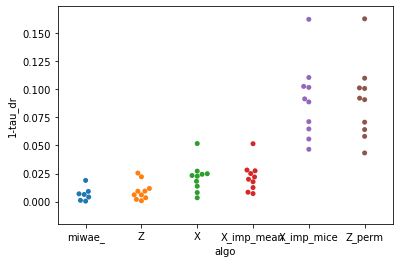

In [5]:
boxplot_with_baseline(df_best)

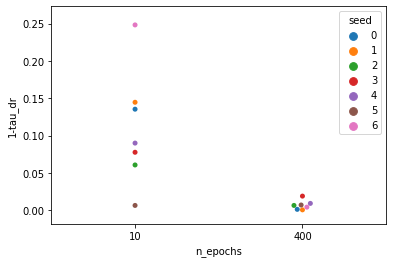

In [17]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='lrmf']
df_ = df_.loc[df_['sig_prior']==.1]
sns.swarmplot(x="n_epochs", y="1-tau_dr",hue="seed", data=df_)

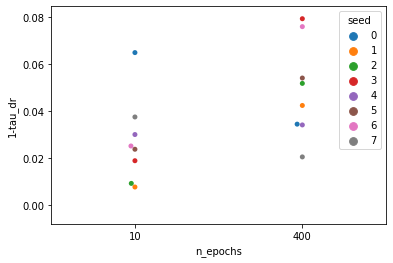

In [18]:
df_ = df
# df_ = df_.loc[df_['n_epochs']==400]
df_ = df_.loc[df_['p']==100]
df_ = df_.loc[df_['prop_miss']==.1]
df_ = df_.loc[df_['model']=='dlvm']
df_ = df_.loc[df_['sig_prior']==.1]
sns.swarmplot(x="n_epochs", y="1-tau_dr",hue="seed", data=df_)

best_params= {'n_epochs': 10, 'n': 1000, 'p': 100, 'method': 'glm', 'prop_miss': 0.1, 'sig_prior': 0.1, 'd': 3, 'model': 'dlvm', 'd_miwae': 3}


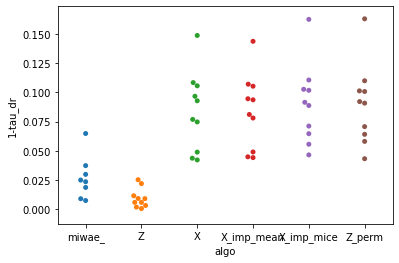

In [19]:
boxplot_with_baseline(df_)

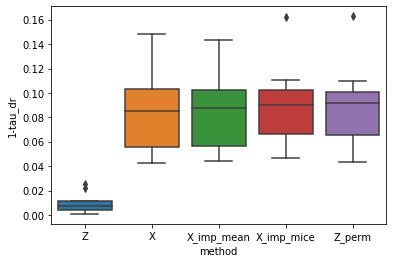

In [271]:
df_base = get_baseline(model="dlvm", show=True)

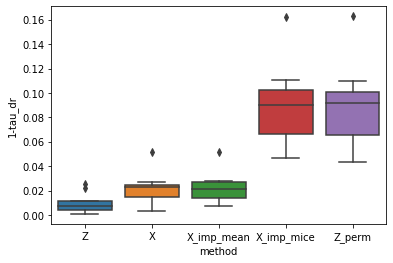

In [272]:
df_base_lrmf = get_baseline(model="lrmf", show=True)

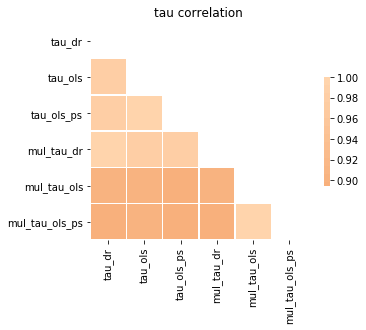

In [344]:
correlation_tau(df)

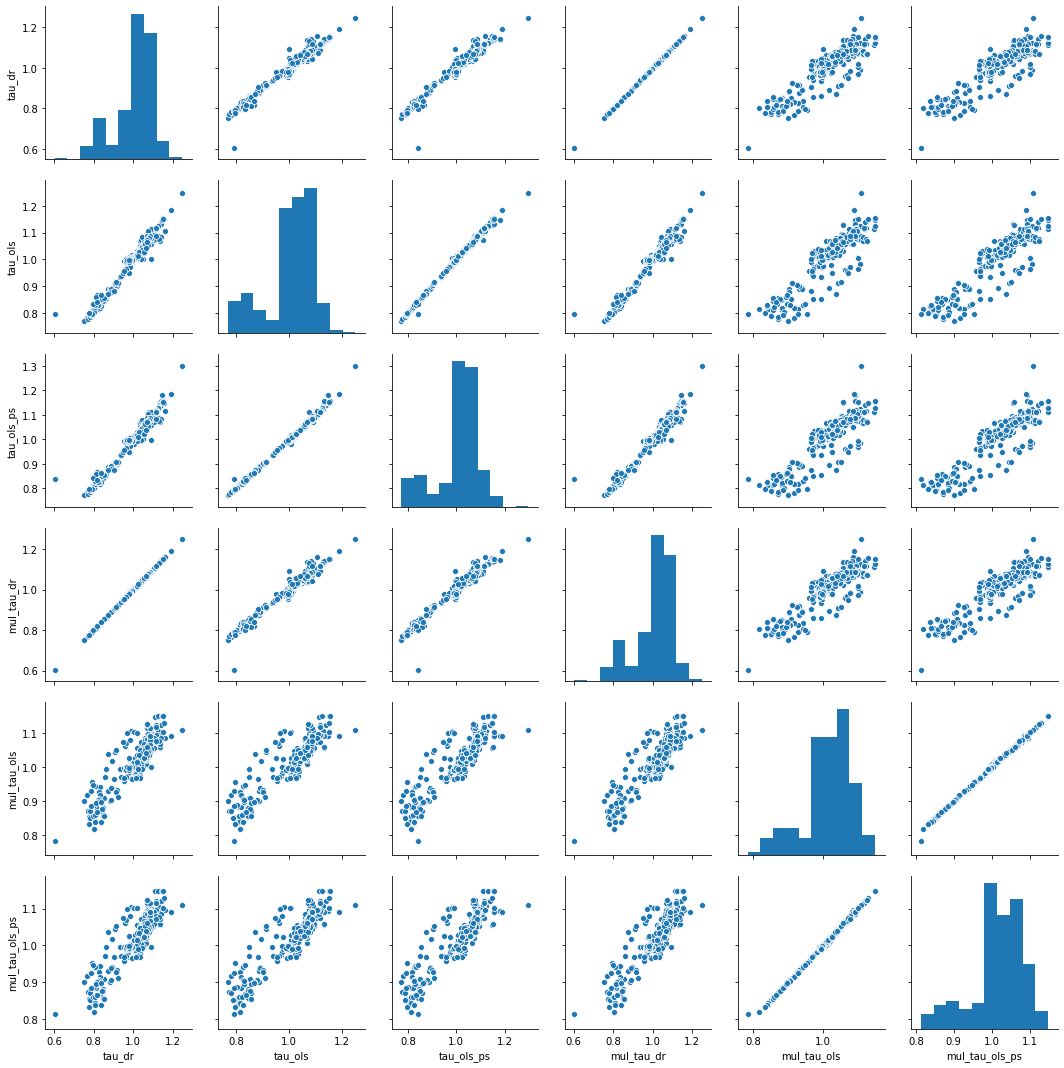

In [345]:
sns.pairplot(df[l_tau])